# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

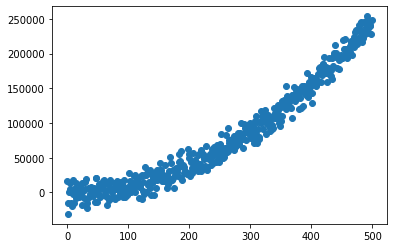

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y


yVals = []
xVals = []
for i in range(0,500):
    xVals.append(i)
    yVals.append(curve_generator(i,10000))
    
    
plt.scatter(xVals,yVals)

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

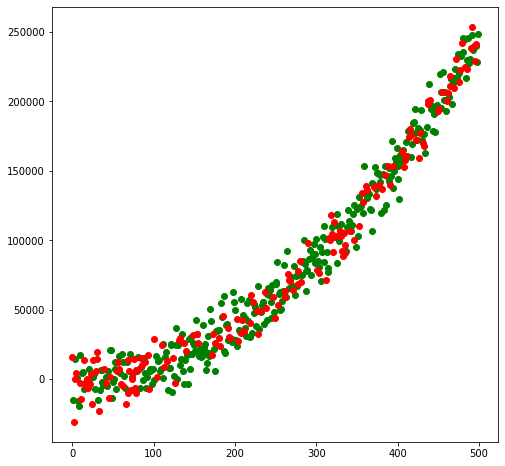

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xVals, yVals, train_size=0.66, test_size=0.33, random_state=42)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.scatter(x_train,y_train, c = 'green', norm = 'log')
plt.scatter(x_test, y_test, c = 'red', norm = 'log')
plt.show()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

[257.82740031285584, 135.6100910583491, 89.2155725394746, 89.22770202076771, 89.37084202865368, 89.39004886468955, 89.89129636648018, 89.94820137291546, 89.95559331173055, 90.0269046559615, 90.01553746584456, 89.70354903818573, 90.14882420268718, 90.36683284269034, 90.65544411548396, 90.71830855739704, 90.76500908912878, 91.18016157756357, 91.26771355666921, 91.23299225913232, 91.23197983740509]


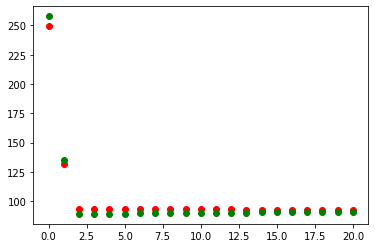

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
#x variable is degree of polynomial regression
#2 functions, y variable is the RMSE value


coeff = []
trainError = []
testError = []
polyDegree = []


for i in range(0,21):
    trainFit = np.polyfit(x_train, y_train, deg = i, full = True)

    coeff.append(trainFit[0])
    polyDegree.append(i)
    temp = 0

    for j in range(0, len(x_train)):
        val = np.polyval(coeff[i], x_train[j])     
        temp = temp + (abs(val - y_train[j]))

    trainError.append((temp/len(x_train))**(1/2))



for i in range(0,21):
    temp = 0
    for j in range(0, len(x_test)):
        val = np.polyval(coeff[i], x_test[j])
        temp = temp + (abs(val - y_test[j]))

    testError.append((temp/len(x_test))**(1/2))

    



print(testError)
plt.scatter(polyDegree, trainError, c='red')
plt.scatter(polyDegree, testError, c='green')
    
    
fig2 = plt.figure()
fig2.set_figwidth(8)
fig2.set_figheight(8)

### **c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

In [ ]:
size = []

error_train1 = []
error_train2 = []
error_train5 = []
error_train10 = []

error_test1 = []
error_test2 = []
error_test5 = []
error_test10 = []

coef1 = []
coef2 = []
coef5 = []
coef10 = []

for i in range(2, 11):
    
    s=(1/i)
    size.append(s)
    
    x_train, x_test, y_train, y_test = train_test_split(xVals, yVals, test_size=s, random_state=42)

    lst1 = np.polyfit(x_train, y_train, 1, full=True)
    coef1.append(lst1[0])
    temp1 = 0
    for j in range(0, len(x_train)):
        val1 = np.polyval(coef1[i-2], x_train[j])
        temp1 = temp1 + (abs(val1-y_train[j]))
    error_train1.append((temp1/len(x_train))**(1/2))

    lst2 = np.polyfit(x_train, y_train, 2, full=True)
    coef2.append(lst2[0])
    temp2 = 0
    for j in range(0, len(x_train)):
        val2 = np.polyval(coef2[i-2], x_train[j])
        temp2 = temp2 + (abs(val2-y_train[j]))
    error_train2.append((temp2/len(x_train))**(1/2))
        
    lst5 = np.polyfit(x_train, y_train, 5, full=True)
    coef5.append(lst5[0])
    temp5 = 0
    for j in range(0, len(x_train)):
        val5 = np.polyval(coef5[i-2], x_train[j])
        temp5 = temp5 + (abs(val5-y_train[j]))
    error_train5.append((temp5/len(x_train))**(1/2))
        
    lst10 = np.polyfit(x_train, y_train, 10, full=True)
    coef10.append(lst10[0])
    temp10 = 0
    for j in range(0, len(x_train)):
        val10 = np.polyval(coef10[i-2], x_train[j])
        temp10 = temp10 + (abs(val10-y_train[j]))
    error_train10.append((temp10/len(x_train))**(1/2))

for i in range(0, len(coef1)):
    temp1 = 0
    temp2 = 0
    temp5 = 0
    temp10 = 0
    for j in range(0, len(x_test)):
            val1 = np.polyval(coef1[i], x_test[j])
            temp1 = temp1 + (abs(val1-y_test[j]))
            val2 = np.polyval(coef2[i], x_test[j])
            temp2 = temp2 + (abs(val2-y_test[j]))
            val5 = np.polyval(coef5[i], x_test[j])
            temp5 = temp5 + (abs(val5-y_test[j]))
            val10 = np.polyval(coef10[i], x_test[j])
            temp10 = temp10 + (abs(val10-y_test[j]))

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

In [ ]:
# imports for plotting and displaying the data
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("white")
sns.set_color_codes("dark")

11490434/11490434 [==============================] - 1s 0us/step


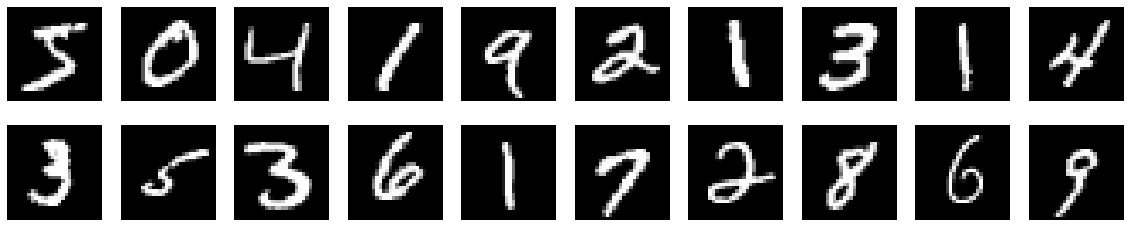

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test.shape

plt.figure(figsize=(20,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.axis('off')
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [ ]:
# rescale the data to numbers between 0-1, by convention and to improve training efficiency
x_train = x_train / 255
x_test = x_test / 255

# store the pictures in an appropriate tensor 28x28 pictures with only 1 channel 
# the -1 parameter indicates keras should infer the shape of the matrix (in this case 60000)
x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1)
# tensorflow will not perform the necessary operations if data is stored as different types
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")


# change target variable to categorical attribute (one-hot-encoding):
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#Initialize the Sequential model:
model = Sequential() 

#Add a 2D convolutional layer: params (in order): number of filters, size of the kernel, the others are written there.
model.add(Conv2D(32, (5, 5), strides=(1, 1), input_shape=(28, 28, 1), activation='relu', data_format="channels_last")) 

#Another 2D convolutional layer: declaring the input shape is only necessary for the first layer
model.add(Conv2D(64, (5, 5), activation='relu'))

#Add a 2x2 MaxPool layer: how big will the outputs be?
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Flatten the output, because the next layer will be a Dense (Fully Connected) layer, which accepts 1 dimensional inputs.
model.add(Flatten())

#Another Dense layer: Why do we use 10 output units? 
model.add(Dense(10, activation='softmax'))

#Compiling the model, loss: categorical crossentropy, it is the most popular for these kind of problems,
#optimizer: adam, a faster variant of the stochastic gradient method
#metrics: accuracy (We want to know the accuracy after each epoch.)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
#We want to stop the training process, if the loss on the validation set did not improve since 10 epochs.
early_stopping=EarlyStopping(patience=10, verbose=1)

#We do not want to store the weights of the model after the last epoch, we want the weights of the best model!
#We will store those weights in a file weights.hdf5
checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

#We call the fit method with 100 epochs, 128 batch_size, and 0.2 validation split. 
#We have to specify which callbacks or 'plugins' we want to use.
network_history = model.fit(x_train, y_train, batch_size=128, 
                            epochs=100, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])

Epoch 1/100
374/375 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9411
Epoch 1: val_loss improved from inf to 0.06565, saving model to weights.hdf5
375/375 [==============================] - 11s 9ms/step - loss: 0.1975 - accuracy: 0.9412 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 2/100
370/375 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9823
Epoch 2: val_loss improved from 0.06565 to 0.05108, saving model to weights.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0511 - val_accuracy: 0.9858
Epoch 3/100
372/375 [============================>.] - ETA: 0s - loss: 0.0375 - accuracy: 0.9884
Epoch 3: val_loss improved from 0.05108 to 0.04934, saving model to weights.hdf5
375/375 [==============================] - 3s 8ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 4/100
373/375 [============================>.] - ETA: 0s - loss: 0.029

In [ ]:
2 activtation functions: sigmoid, sigmoid, optimizer = SGD:
- loss: 0.0838
- accuracy: 0.9765
- val_loss: 0.0866
- val_accuracy: 0.9769

2 activtation functions: relu, sigmoid, optimizer = Adam:
- loss: 5.7533e-04
- accuracy: 1.0000
- val_loss: 0.0462 
- val_accuracy: 0.9906

2 activtation functions: sigmoid, relu, optimizer = Adam:
- loss: 0.0900 
- accuracy: 0.9722 
- val_loss: 0.1049 
- val_accuracy: 0.9696







SyntaxError: ignored

In [ ]:
# using the trained model to recognize hand-written digits
from keras.models import load_model
model = load_model("weights.hdf5")
test_err = model.evaluate(x_test,y_test)
print("Loss on test set:", test_err[0], "Accuracy on test set:", test_err[1])


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("Test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro")) #one vs rest averages or global
print("Recall", recall_score(y_true, y_pred, average="macro")) #macro calculates the average of the recall for each class
print("f1_score", f1_score(y_true, y_pred, average="macro")) #macro is good for balanced data set, micro is good for imbalanced
print("\n Confusion matrix ")
conf=confusion_matrix(y_true, y_pred)
print(conf)





313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9893
Loss on test set: 0.03606965392827988 Accuracy on test set: 0.989300012588501
313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9893
Precision 0.9892131805342327
Recall 0.9892201690754414
f1_score 0.9891892749357181

 Confusion matrix 
[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1125    2    0    0    1    2    3    2    0]
 [   1    0 1017    0    3    0    1    6    4    0]
 [   0    0    2 1004    0    1    0    2    1    0]
 [   0    0    0    0  980    0    0    0    1    1]
 [   2    0    0    7    0  876    2    2    1    2]
 [   4    2    0    0    2    2  945    0    3    0]
 [   0    0    2    2    0    1    0 1022    1    0]
 [   4    0    2    1    0    1    0    1  963    2]
 [   3    0    1    0   10    5    0    5    1  984]]


**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>

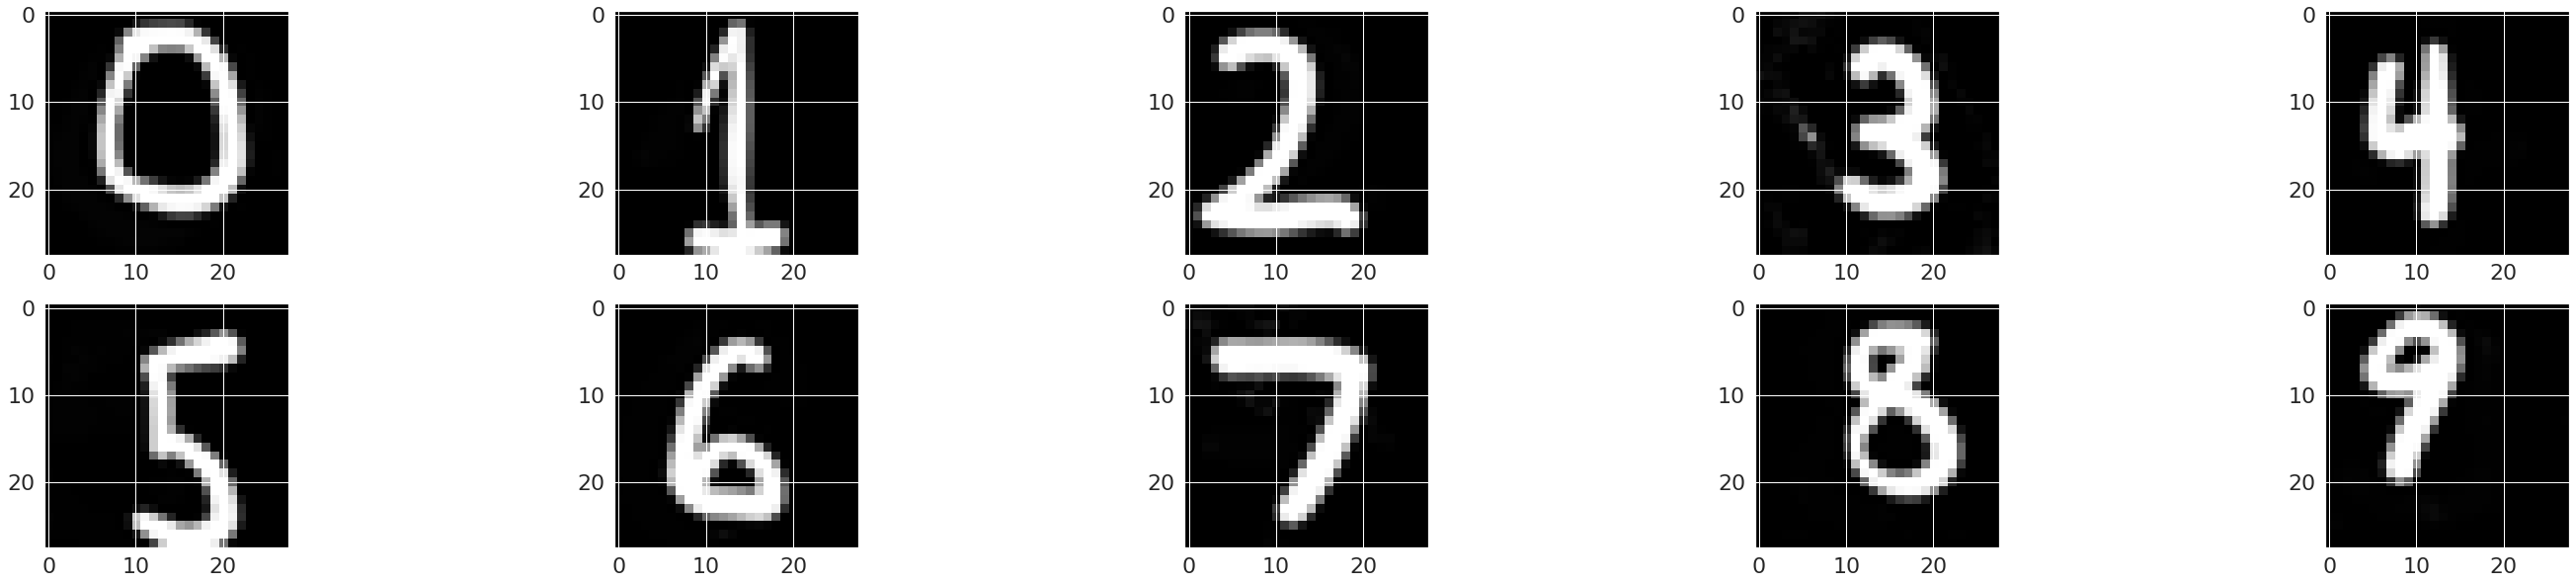

In [ ]:
sns.set(font_scale = 2)
# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 225 , 229 , 451 , 458 )
thresholds[ 1 ] = ( 675 , 229 , 901 , 458 )
thresholds[ 2 ] = ( 1126 , 229 , 1352 , 458 )
thresholds[ 3 ] = ( 1576 , 229 , 1802 , 458 )
thresholds[ 4 ] = ( 2027 , 229 , 2253 , 458 )
thresholds[ 5 ] = ( 225 , 687 , 451 , 916 )
thresholds[ 6 ] = ( 675 , 687 , 901 , 916 )
thresholds[ 7 ] = ( 1126 , 687 , 1352 , 916 )
thresholds[ 8 ] = ( 1576 , 687 , 1802 , 916 )
thresholds[ 9 ] = ( 2027 , 687 , 2253 , 916 )

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    image = Image.open("./digitsCole.jpg" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

1/1 [==============================] - 0s 22ms/step


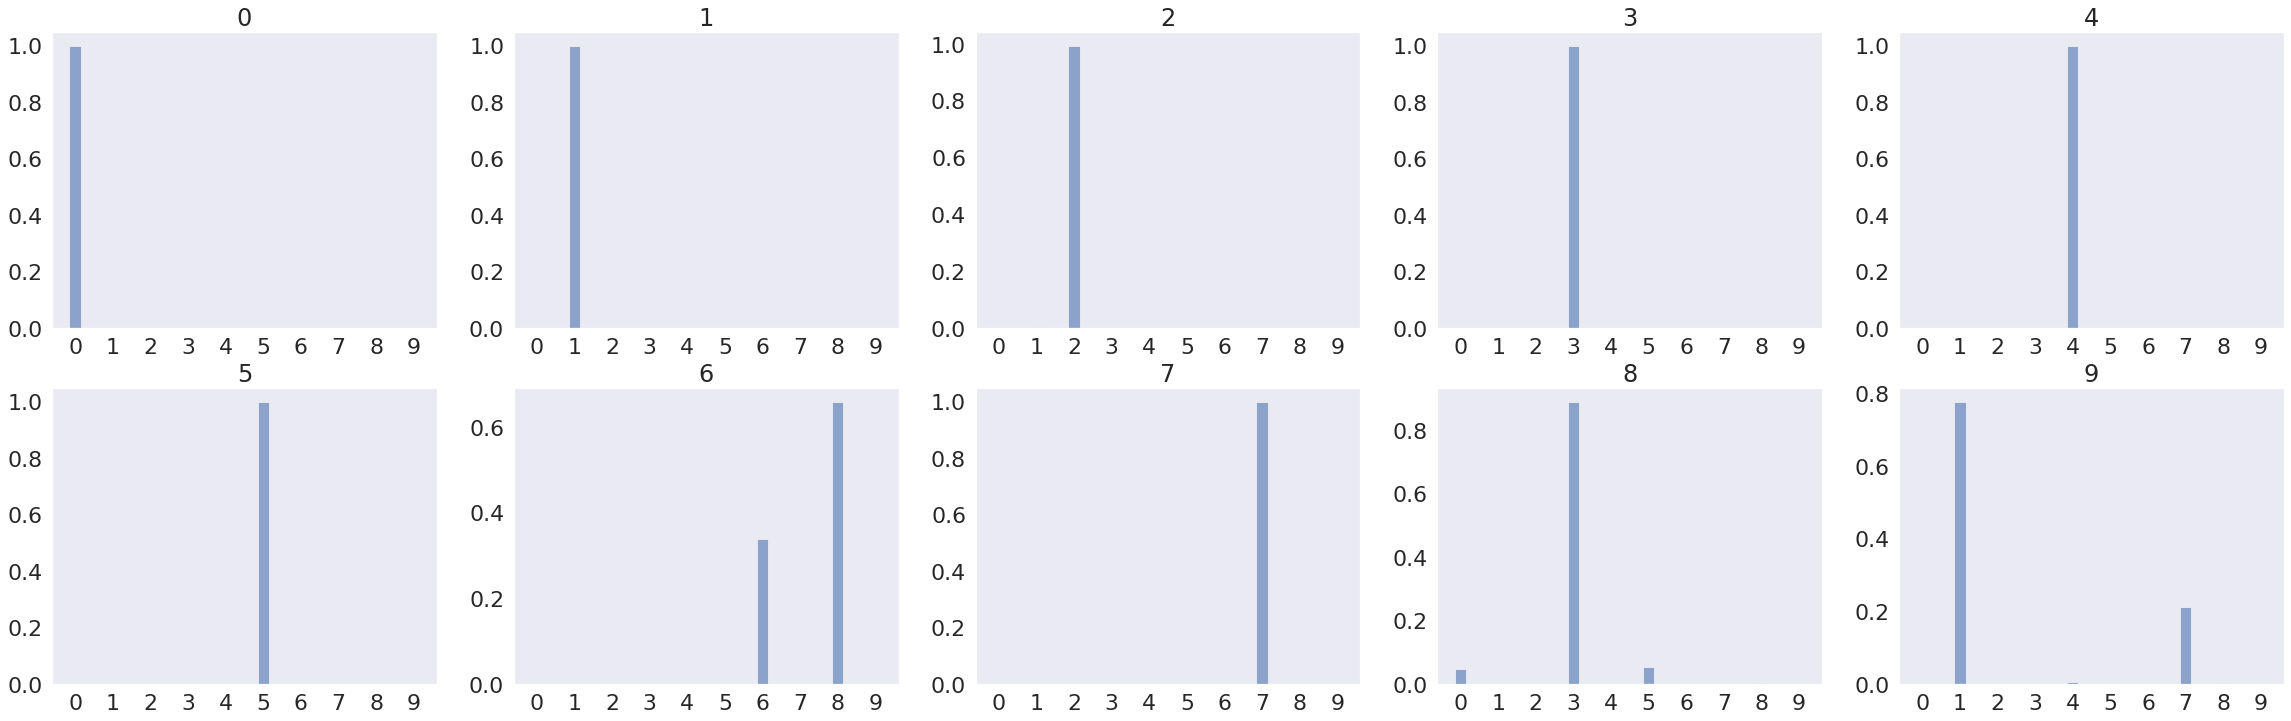

In [ ]:
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = Image.open( "./digitsCole.jpg" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( -1 , 28 , 28 , 1 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

In [ ]:
# The model recognizes my handwriting farely well,
# it is obviously not an exact match with some numbers before more different that others but overall it performed decently.